<a href="https://colab.research.google.com/github/P-Dammy/RNN-for-Sentiment-Analysis-on-IMDB-Movie-Reviews/blob/main/Recurrent_Neural_Network(RNN)_on_IMDB_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recurrent Neural Networks (RNNs) is a class of neural network designed to work with sequential data.RNNs have connections that loop back on themselves, allowing them to maintain information about previous inputs. This makes them ideal for tasks such as language modeling, time-series forecasting, and speech recognition.
RNNs are able to remember information from previous steps, which is important when the input has a temporal or sequential structure.

This analysis will be carried out using the IMDB Dataset

In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np

In [ ]:
# Loading IMDB dataset
max_words = 10000  # Use only the top 10,000 words in the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

# Checking the size of the datasets
print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

# Checking the first training sample (which is encoded)
print(f"First review (encoded): {X_train[0]}")
print(f"First review label: {y_train[0]}")

# Exploring the length of reviews
review_lengths = [len(review) for review in X_train]
print(f"Average review length: {np.mean(review_lengths):.2f} words")


Training samples: 25000, Test samples: 25000
First review (encoded): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 

In [19]:
# Loading the IMDB dataset word index
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

# Function to decode the integer sequences back to words
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Function to print a review by row index
def print_review_by_index(index, dataset='train'):
    (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

    if dataset == 'train':
        review = X_train[index]
        label = y_train[index]
    elif dataset == 'test':
        review = X_test[index]
        label = y_test[index]
    else:
        print("Invalid dataset specified. Use 'train' or 'test'.")
        return

    decoded_review = decode_review(review)
    print(f"Review (index {index}):\n{decoded_review}\n")
    print(f"Sentiment: {'Positive' if label == 1 else 'Negative'}\n")


In [ ]:
print_review_by_index(5, 'train')
print("")
print_review_by_index(25, 'train')
print("")
print_review_by_index(5, 'test')
print("")
print_review_by_index(25, 'test')


Review (index 5):
? begins better than it ends funny that the russian submarine crew ? all other actors it's like those scenes where documentary shots br br spoiler part the message ? was contrary to the whole story it just does not ? br br

Sentiment: Negative


Review (index 25):
? this is a very light headed comedy about a wonderful family that has a son called pecker because he use to peck at his food pecker loves to take all kinds of pictures of the people in a small ? of ? ? and manages to get the attention of a group of photo art lovers from new york city pecker has a cute sister who goes simply nuts over sugar and is actually an addict taking ? of sugar from a bag there are scenes of men showing off the ? in their ? with ? movements and ? doing pretty much the same it is rather hard to keep your mind out of the ? with this film but who cares it is only a film to give you a few laughs at a simple picture made in 1998

Sentiment: Positive


Review (index 5):
? i'm absolutely disg

Reviews in the IMDB dataset have varying lengths. it is  necessary to pad them to a fixed length so that all reviews are the same size when passed to the model.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Paddng sequences to ensure all reviews have the same length
maxlen = 200  # Maximum review length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

print(f"Training data shape after padding: {X_train.shape}")
print(f"First review (padded): {X_train[0]}")


Training data shape after padding: (25000, 200)
First review (padded): [   5   25  100   43  838  112   50  670    2    9   35  480  284    5
  150    4  172  112  167    2  336  385   39    4  172 4536 1111   17
  546   38   13  447    4  192   50   16    6  147 2025   19   14   22
    4 1920 4613  469    4   22   71   87   12   16   43  530   38   76
   15   13 1247    4   22   17  515   17   12   16  626   18    2    5
   62  386   12    8  316    8  106    5    4 2223 5244   16  480   66
 3785   33    4  130   12   16   38  619    5   25  124   51   36  135
   48   25 1415   33    6   22   12  215   28   77   52    5   14  407
   16   82    2    8    4  107  117 5952   15  256    4    2    7 3766
    5  723   36   71   43  530  476   26  400  317   46    7    4    2
 1029   13  104   88    4  381   15  297   98   32 2071   56   26  141
    6  194 7486   18    4  226   22   21  134  476   26  480    5  144
   30 5535   18   51   36   28  224   92   25  104    4  226   65   16
   38 

In [37]:
# Using LSTM (a type of RNN) to handle long-term dependencies in the text.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Defining RNN model
model = Sequential()

# Embedding layer: Turns positive integers (indexes) into dense vectors of fixed size
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=maxlen))

# LSTM layer
model.add(LSTM(64))

# Fully connected layer (output layer)
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Training the model with validation set
from tensorflow.keras.callbacks import EarlyStopping

# Training the model with validation set
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=2)])


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 86s 268ms/step - accuracy: 0.7308 - loss: 0.5174 - val_accuracy: 0.8310 - val_loss: 0.3697
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 138s 254ms/step - accuracy: 0.8924 - loss: 0.2722 - val_accuracy: 0.8782 - val_loss: 0.3060
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 79s 253ms/step - accuracy: 0.9337 - loss: 0.1803 - val_accuracy: 0.8710 - val_loss: 0.3540
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 253ms/step - accuracy: 0.9449 - loss: 0.1486 - val_accuracy: 0.8562 - val_loss: 0.3545


In [31]:
# Evaluating the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8572 - loss: 0.3680
Test Accuracy: 0.8591


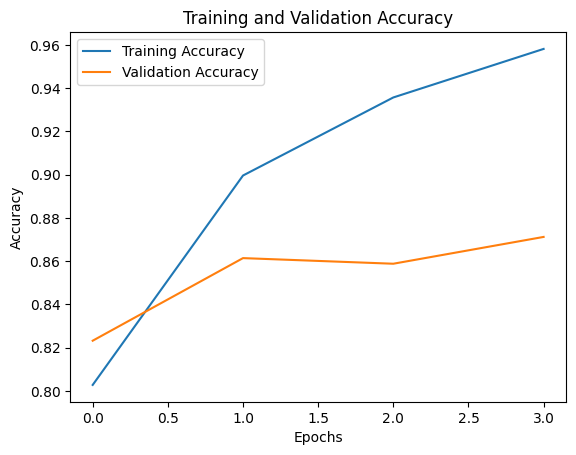

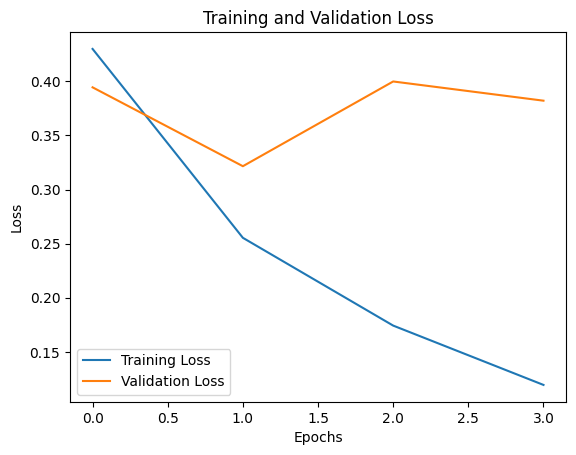

In [14]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [32]:
# Function for predicting review
def predict_review_sentiment(review, model = model, word_index = imdb.get_word_index(), maxlen=200):
    """
    Encodes the input review string, pads it, and passes it to the model for prediction.

    Args:
        review (str): The movie review as a string.
        model: The trained Keras model.
        word_index (dict): Dictionary mapping words to their integer index.
        maxlen (int): Maximum length of review sequence for padding. Default is 200.

    Returns:
        str: 'Positive' or 'Negative' based on the model's prediction.
    """
    # Preprocess the input review string
    def encode_review(review, word_index):
        # Tokenize the review into words
        review_tokens = review.lower().split()
        # Encode the tokens into integers based on word_index
        encoded = [word_index.get(word, 2) for word in review_tokens]  # 2 is the index for unknown words
        return encoded

    # Encode the review
    encoded_review = encode_review(review, word_index)

    # Pad the encoded review to ensure it's the correct length for the model
    padded_review = pad_sequences([encoded_review], maxlen=maxlen)

    # Use the model to predict sentiment
    prediction = model.predict(padded_review)

    # Return the prediction result
    if prediction[0] > 0.5:
        return 'Positive'
    else:
        return 'Negative'


In [36]:
sampleReview = 'Good movie.'
predict_review_sentiment(sampleReview)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


'Positive'